## Contents
**regions**
1. Simple version of plotting polarization as a function of distance

*Note: this doesn't work*

In [1]:
import matplotlib
import aplpy
import scipy.optimize as opt

from regions import Regions
from regions.core import PixCoord
from regions.shapes import RectangleSkyRegion, RectanglePixelRegion

import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import Angle, SkyCoord
import numpy as np

matplotlib.rcParams.update({'font.size': 11})


In [2]:
regions_file = '/Users/alisonandrade/Documents/alison_17/590thesis/orion/OrionMaps/regions.reg'
orion_A_file = '/Users/alisonandrade/Documents/alison_17/590thesis/orion/OrionMaps/Planck_353GHz_2048_l212.0_b-19.0_w8_fwhm10.fits'

orion_A = fits.open(orion_A_file)

In [3]:
with fits.open(orion_A_file) as orion_A:
    i_stokes = orion_A[0].data
    q_stokes = orion_A[1].data
    u_stokes = orion_A[2].data
    polint = orion_A[3].data
    pol_frac = orion_A[4].data
    bpos_ang = orion_A[5].data
    pol_disp = orion_A[6].data
    
regions = Regions.read(regions_file, format = 'ds9') ##same as parsing?


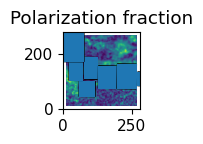

In [4]:
plt.figure(figsize = (1, 1))
ax = plt.subplot(1, 1, 1)

wcs = WCS(orion_A[3].header)
plt.title('Polarization fraction')
plt.imshow(pol_frac)
plt.gca().invert_yaxis()

regions_pix = []
mask_list = []
for x in range(len(regions)):
    region0 = (RectangleSkyRegion(regions[x].center, regions[x].width, regions[x].height, regions[x].angle))
    regions_pix.append(region0.to_pixel(wcs))
    regions_pix[x].plot()
    
    mask = regions_pix[x].to_mask()
    mask_list.append(mask)
    ax.add_artist(mask.bbox.as_artist())

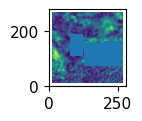

In [5]:
plt.figure(figsize = (1, 1))
plt.imshow(pol_frac)
ax = plt.subplot(1, 1, 1)
plt.gca().invert_yaxis()

for x in range(3):
    mask = regions_pix[x].to_mask()
    mask_list.append(mask)
    ax.add_artist(mask.bbox.as_artist())

In [6]:
pol_frac_list = []
for x in range(len(mask_list)):
    mask0 = mask_list[x].to_image(pol_frac.shape)
    
    mask_trial = np.logical_and(pol_frac, mask0 == 1)
    mask_coord = mask_trial.nonzero() 
    pol_frac_list.append(pol_frac[mask_coord])

for x in range(len(pol_frac_list)):
    pol_frac_list[x] = pol_frac_list[x][~np.isnan(pol_frac_list[x])]

x = [np.median(pol_frac_list[x]) for x in range(len(pol_frac_list))]


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [7]:
np.median(pol_frac[0].data)
pol_frac_list[x] = pol_frac_list[x][~np.isnan(pol_frac_list[x])] ##removing all nan values (i.e. from list [3])

TypeError: list indices must be integers or slices, not list

In [ ]:
img = np.random.random((5, 5))
mask = np.array([
        [0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0],
        [1, 1, 1, 1, 1],
        [0, 1, 1, 1, 0],
        [0, 0, 1, 0, 0],
       ], dtype=bool)
